# Histogram and Scatterplots
created by krohak 2018-01-14

In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp.rename(columns={'Adj Close': symbol}, inplace=True)
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
    return df

def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns = (df / df.shift(1)) - 1
    daily_returns.iloc[0, :] = 0
    return daily_returns

def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()
    
def normalize_data(df):
  """Normalize stock prices using the first row of the dataframe."""
  return df / df.iloc[0, :]

In [2]:
dates = pd.date_range('2010-01-01', '2010-12-31')
df = get_data(symbols=[],dates=dates)
df.head()

,SPY
2010-01-04,97.788948
2010-01-05,98.047805
2010-01-06,98.116836
2010-01-07,98.531016
2010-01-08,98.858904


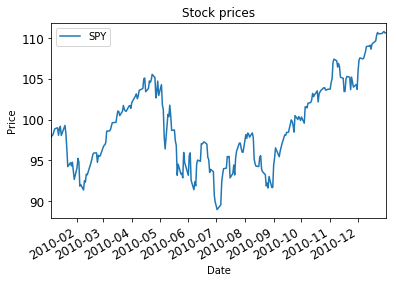

In [3]:
plot_data(df)

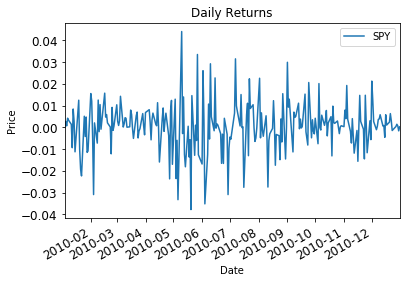

In [6]:
daily_returns=compute_daily_returns(df)
plot_data(daily_returns,title="Daily Returns")

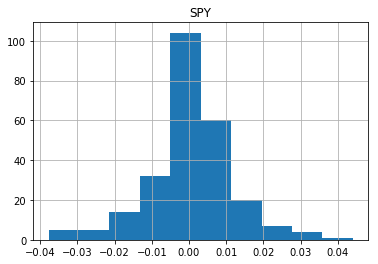

In [9]:
daily_returns.hist()
plt.show()

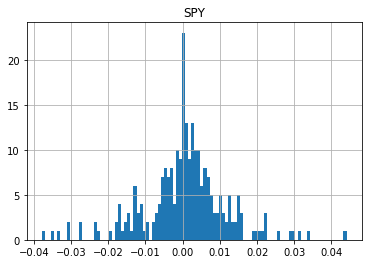

In [12]:
daily_returns.hist(bins=100)
plt.show()

In [22]:
mean = daily_returns['SPY'].mean()
print(mean)
std = daily_returns['SPY'].std()
print(std)

0.000552980565083133
0.01124721124315204


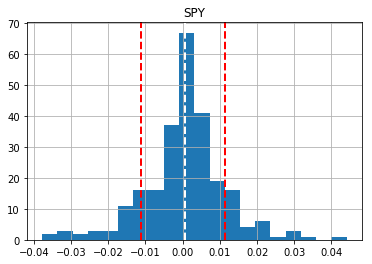

In [25]:
daily_returns.hist(bins=20)
plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.show()

In [26]:
daily_returns.kurtosis()

SPY    2.152446
dtype: float64

## Compare - Histogram

We calculate the histogram from the DAILY RETURNS of the two stocks. It gives us a sense how the daily returns compare to each other

In [27]:
dates = pd.date_range('2010-01-01', '2010-12-31')
df = get_data(symbols=['XOM'],dates=dates)
df.head()

,SPY,XOM
2010-01-04,97.788948,56.187171
2010-01-05,98.047805,56.406554
2010-01-06,98.116836,56.894077
2010-01-07,98.531016,56.715323
2010-01-08,98.858904,56.487807


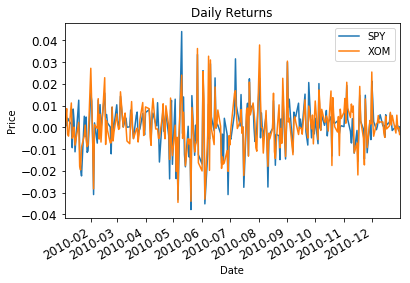

In [28]:
daily_returns=compute_daily_returns(df)
plot_data(daily_returns,title="Daily Returns")

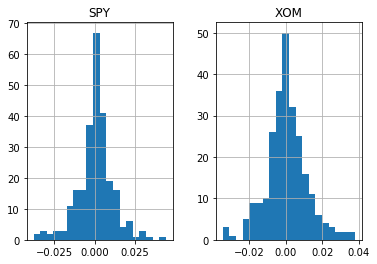

In [29]:
daily_returns.hist(bins=20)
plt.show()

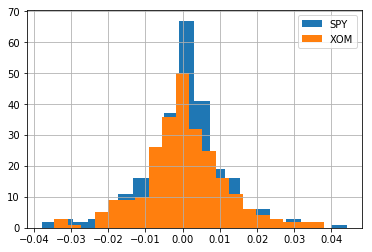

In [30]:
daily_returns['SPY'].hist(bins=20,label='SPY')
daily_returns['XOM'].hist(bins=20,label='XOM')
plt.legend(loc='upper right')
plt.show()

A lower peak corresponds to higher volitility as the stocks are distributed over a higher range of prices. A right shift of the gaussian corresponds to a higher return, since the mean is higer.

In [32]:
print(daily_returns['SPY'].kurtosis())
print(daily_returns['XOM'].kurtosis())

2.15244563922
1.36178445903


Kurtosis is the thickness of the tails of the histogram. It is used to compare the stock to an ideal gaussian.

## Compare - Scatterplot

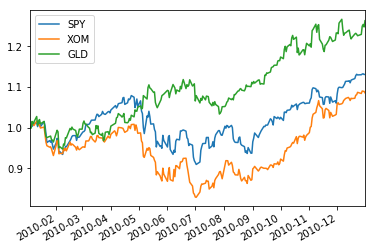

In [54]:
dates = pd.date_range('2010-01-01', '2010-12-31')
df = get_data(symbols=['XOM','GLD'],dates=dates)
df = normalize_data(df)
df.plot()
plt.show()

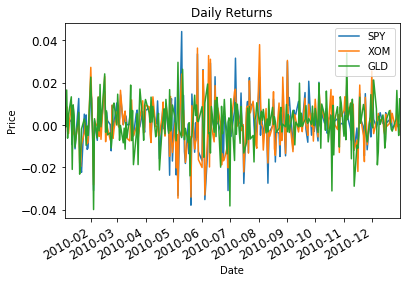

In [34]:
daily_returns=compute_daily_returns(df)
plot_data(daily_returns,title="Daily Returns")

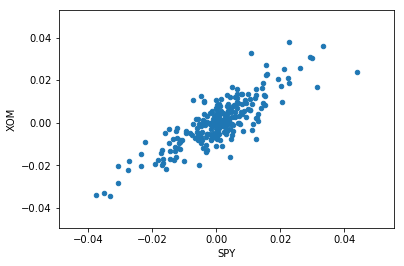

In [38]:
daily_returns.plot(kind='scatter',x='SPY',y='XOM')
plt.show()

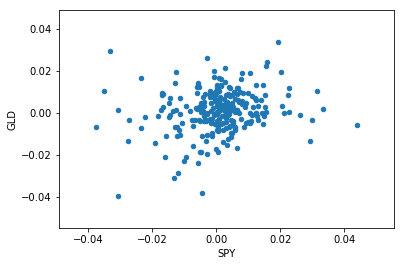

In [39]:
daily_returns.plot(kind='scatter',x='SPY',y='GLD')
plt.show()

In [40]:
beta_XOM , alpha_XOM = np.polyfit(daily_returns['SPY'],daily_returns['XOM'],1)
print(beta_XOM , alpha_XOM)

0.840850467666 -7.40176374877e-05


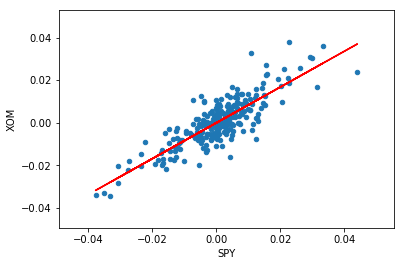

In [43]:
daily_returns.plot(kind='scatter',x='SPY',y='XOM')
plt.plot(daily_returns['SPY'],daily_returns['SPY']*beta_XOM + alpha_XOM,'-',color='r')
plt.show()

0.172040677524 0.000886875450933


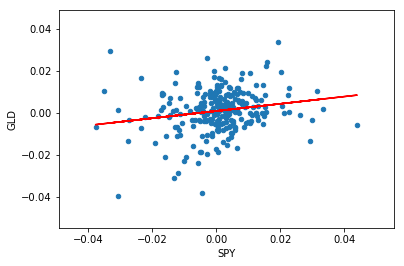

In [45]:
beta_GLD , alpha_GLD = np.polyfit(daily_returns['SPY'],daily_returns['GLD'],1)
print(beta_GLD , alpha_GLD)
daily_returns.plot(kind='scatter',x='SPY',y='GLD')
plt.plot(daily_returns['SPY'],daily_returns['SPY']*beta_GLD + alpha_GLD,'-',color='r')
plt.show()

In [64]:
daily_returns.corr(method='pearson')

,SPY,XOM,GLD
SPY,1.000000,0.836786,0.186382
XOM,0.836786,1.000000,0.180657
GLD,0.186382,0.180657,1.000000
